In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = "cifar100/new/500client/u0.3_alpha1.5_beta5000/stats.csv"

distribution = np.loadtxt(csv_path, delimiter=',')
num_clients, num_classes = distribution.shape

sparsity = round(np.sum(distribution == 0)/(num_clients * num_classes), 2)
by_client_volume = np.sum(distribution, axis=1)

T = 50
scarcity = np.sum(by_client_volume < T) / num_clients

print(sparsity, scarcity)

0.96 0.954


: 

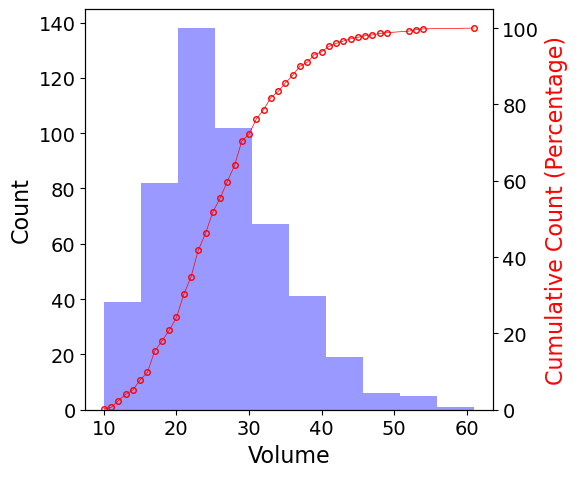

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 14})

plt_data = np.sum(distribution, axis=1)
fig, ax = plt.subplots(figsize=(6,5))
p = ax.hist(plt_data, color='#9999FF')
ax.set_xlabel("Volume", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax2 = ax.twinx()
val, freq = np.unique(plt_data, return_counts=True)
ax2.plot(val, 100 * np.cumsum(freq)/num_clients, 
         linestyle='-', marker = 'o', 
         fillstyle='none', color='red', linewidth=0.5, markersize=4)

ax2.set_ylabel("Cumulative Count (Percentage)", fontsize=16, color='red')
ax2.set_ylim(0,105)
fig.tight_layout()

In [5]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

### CIFAR-10

In [14]:
csv_paths = [
    "cifar10/new/500client/u0.25_alpha0.1_beta5000/stats.csv",
    "./cifar10/ablation/500client/u0.25_sparsity0.45_scarcity0.98/stats.csv",
    "./cifar10/ablation/500client/u0.65_sparsity0.45_scarcity0.45/stats.csv",
    "./cifar10/ablation/500client/u0.65_sparsity0.88_scarcity0.45/stats.csv"
]

names = ["Sp=0.88, Sc=0.98", "Sp=0.45, Sc=0.98", "Sp=0.45, Sc=0.45", "Sp=0.88, Sc=0.45"]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = []
indexes = []
vmax = 0

for csv_path in csv_paths:
# csv_path = "cifar10/new/200client/u0.1_alpha0.1_beta2000/stats.csv"
    distribution = np.loadtxt(csv_path, delimiter=',')
    nclient, nclass = distribution.shape

    vmax = max(int(np.max(distribution)), vmax)
    random25 = sorted(np.random.choice(list(range(nclient)), size=25, replace=False))
    indexes.append(random25)
    plot_data.append(distribution[random25])


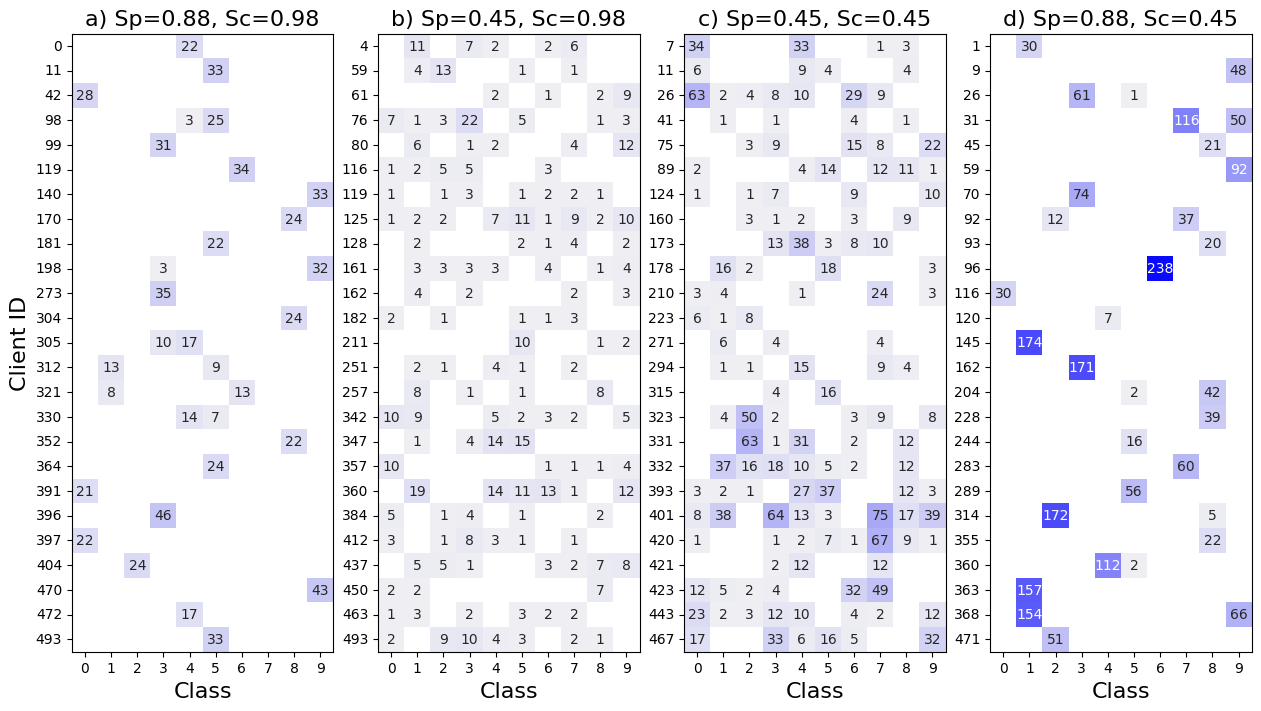

In [26]:
fig = plt.figure(layout="constrained", figsize=(12.5,7))
ax_dict = fig.subplot_mosaic("ABCD")

# Left
for frame, data, index, name in zip(['A', 'B', 'C', 'D'], plot_data, indexes, names):
    sns.heatmap(data = data, ax = ax_dict[frame], fmt=".0f", annot=True, 
                    vmin=0, vmax=vmax,
                    cmap=sns.color_palette("light:b", as_cmap=True), cbar=False,
                    mask=(data==0))

    ax_dict[frame].spines['top'].set_visible(True)
    ax_dict[frame].spines['right'].set_visible(True)
    ax_dict[frame].spines['bottom'].set_visible(True)
    ax_dict[frame].spines['left'].set_visible(True)

    ax_dict[frame].set_yticklabels(labels=[i for i in index], rotation=0, fontsize=10)
    ax_dict[frame].set_xticklabels(labels=[i for i in range(nclass)], rotation=0, fontsize=10)
    ax_dict[frame].set_xlabel("Class", fontsize=16)
    ax_dict[frame].set_title(f"{frame.lower()}) {name}", fontsize=16)

ax_dict['A'].set_ylabel("Client ID", fontsize=16)
plt.savefig("cifar10-N500.svg", format="svg", dpi=400)